In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "D:/Projects_DataAnalyst/Sentiment_Analysis/data/cleaned_reviews.csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0


In [2]:
# Check data types and null values
data.info()

# Statistical summary of numerical columns
data.describe()

# Check for unique values in the 'sentiments' column
print(data['sentiments'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17340 entries, 0 to 17339
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sentiments             17340 non-null  object 
 1   cleaned_review         17337 non-null  object 
 2   cleaned_review_length  17340 non-null  int64  
 3   review_score           17340 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 542.0+ KB
sentiments
positive    9503
neutral     6303
negative    1534
Name: count, dtype: int64


In [3]:
# Drop rows with missing values in 'sentiments' or 'cleaned_review'
data = data.dropna(subset=['sentiments', 'cleaned_review'])

# Ensure all reviews are strings
data['cleaned_review'] = data['cleaned_review'].astype(str)

# Clean 'sentiments' column
data['sentiments'] = data['sentiments'].str.strip().str.title()

# Confirm changes
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17337 entries, 0 to 17339
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sentiments             17337 non-null  object 
 1   cleaned_review         17337 non-null  object 
 2   cleaned_review_length  17337 non-null  int64  
 3   review_score           17337 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 677.2+ KB


C:\Users\aniya\AppData\Local\Temp\ipykernel_18900\3265884932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiments', data=data, order=["Positive", "Neutral", "Negative"], palette="viridis")


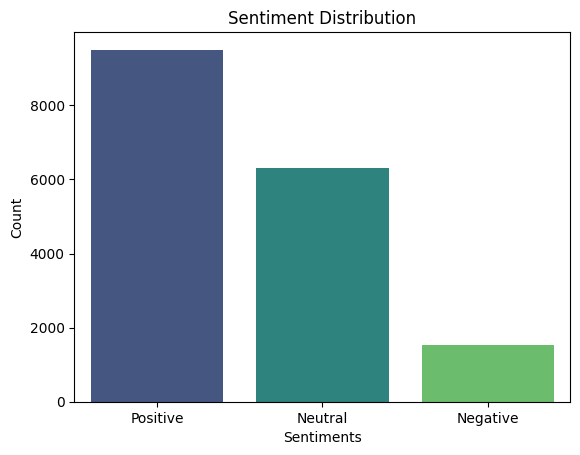

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment Distribution
sns.countplot(x='sentiments', data=data, order=["Positive", "Neutral", "Negative"], palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.show()


In [5]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

# Tokenize words
all_words = " ".join(data['cleaned_review']).split()
filtered_words = [word for word in all_words if word.lower() not in stop_words]

# Count most common words
word_counts = Counter(filtered_words)
print(word_counts.most_common(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aniya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


[('mouse', 6541), ('great', 4606), ('use', 3431), ('sound', 3046), ('good', 2980), ('one', 2719), ('work', 2704), ('charge', 2461), ('like', 2433), ('love', 2378)]


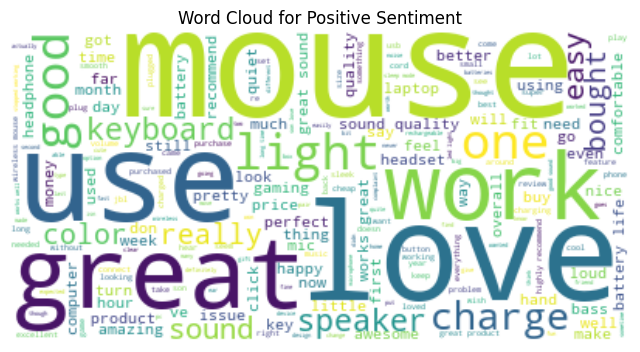

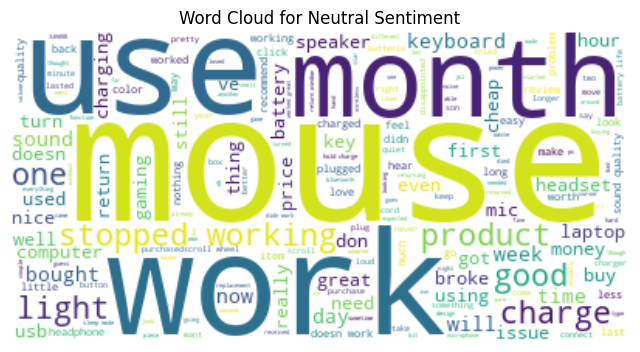

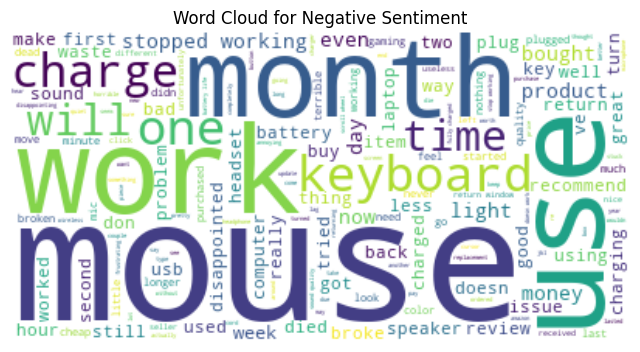

In [6]:
from wordcloud import WordCloud

for sentiment in ['Positive', 'Neutral', 'Negative']:
    sentiment_text = " ".join(data[data['sentiments'] == sentiment]['cleaned_review'])
    wordcloud = WordCloud(background_color='white', max_words=200).generate(sentiment_text)
    
    plt.figure(figsize=(8, 6))
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [7]:
data['word_count'] = data['cleaned_review'].apply(lambda x: len(x.split()))
data.head()


,sentiments,cleaned_review,cleaned_review_length,review_score,word_count
0,Positive,i wish would have gotten one earlier love it a...,19,5.0,19
1,Neutral,i ve learned this lesson again open the packag...,88,1.0,88
2,Neutral,it is so slow and lags find better option,9,2.0,9
3,Neutral,roller ball stopped working within months of m...,12,1.0,12
4,Neutral,i like the color and size but it few days out ...,21,1.0,21


In [8]:
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
data['sentiment_label'] = data['sentiments'].map(sentiment_mapping)
data.head()


,sentiments,cleaned_review,cleaned_review_length,review_score,word_count,sentiment_label
0,Positive,i wish would have gotten one earlier love it a...,19,5.0,19,1
1,Neutral,i ve learned this lesson again open the packag...,88,1.0,88,0
2,Neutral,it is so slow and lags find better option,9,2.0,9,0
3,Neutral,roller ball stopped working within months of m...,12,1.0,12,0
4,Neutral,i like the color and size but it few days out ...,21,1.0,21,0


In [10]:
processed_file_path = "D:/Projects_DataAnalyst/Sentiment_Analysis/data/processed_data.csv"
data.to_csv(processed_file_path, index=False)
print(f"Processed data saved to: {processed_file_path}")


Processed data saved to: D:/Projects_DataAnalyst/Sentiment_Analysis/data/processed_data.csv
